In [10]:
import json
import os 
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))


In [11]:
visualize_fnames = [
    "no_pretraining_lowerLR_100kSteps_seed2",
    "walkerWalkIDMPretrain_100kSteps_seed2",
]

In [12]:
def show_log(log_dir):
    log_dir = os.path.join("/accounts/projects/jsteinhardt/sauravkadavath/DeepRL_Pretraining/logs/walker_walk/no_ss/", log_dir)
    plot_name = log_dir.split("/")[-1]
    log_fname = os.path.join(log_dir, "train.log")
    eval_fname = os.path.join(log_dir, "eval.log")
    
    X = []
    y = []
    
    with open(log_fname, 'r') as f:
        for line in f:
            curr_log = json.loads(line)
            X.append(curr_log['step'])
            y.append(curr_log['episode_reward'])
    
    # Calculate moving average
    N=1
    y = np.convolve(y, np.ones((N,))/N, mode='same')
    
    X = X[:-N//2]
    y = y[:-N//2]
    
    return X, y, plot_name

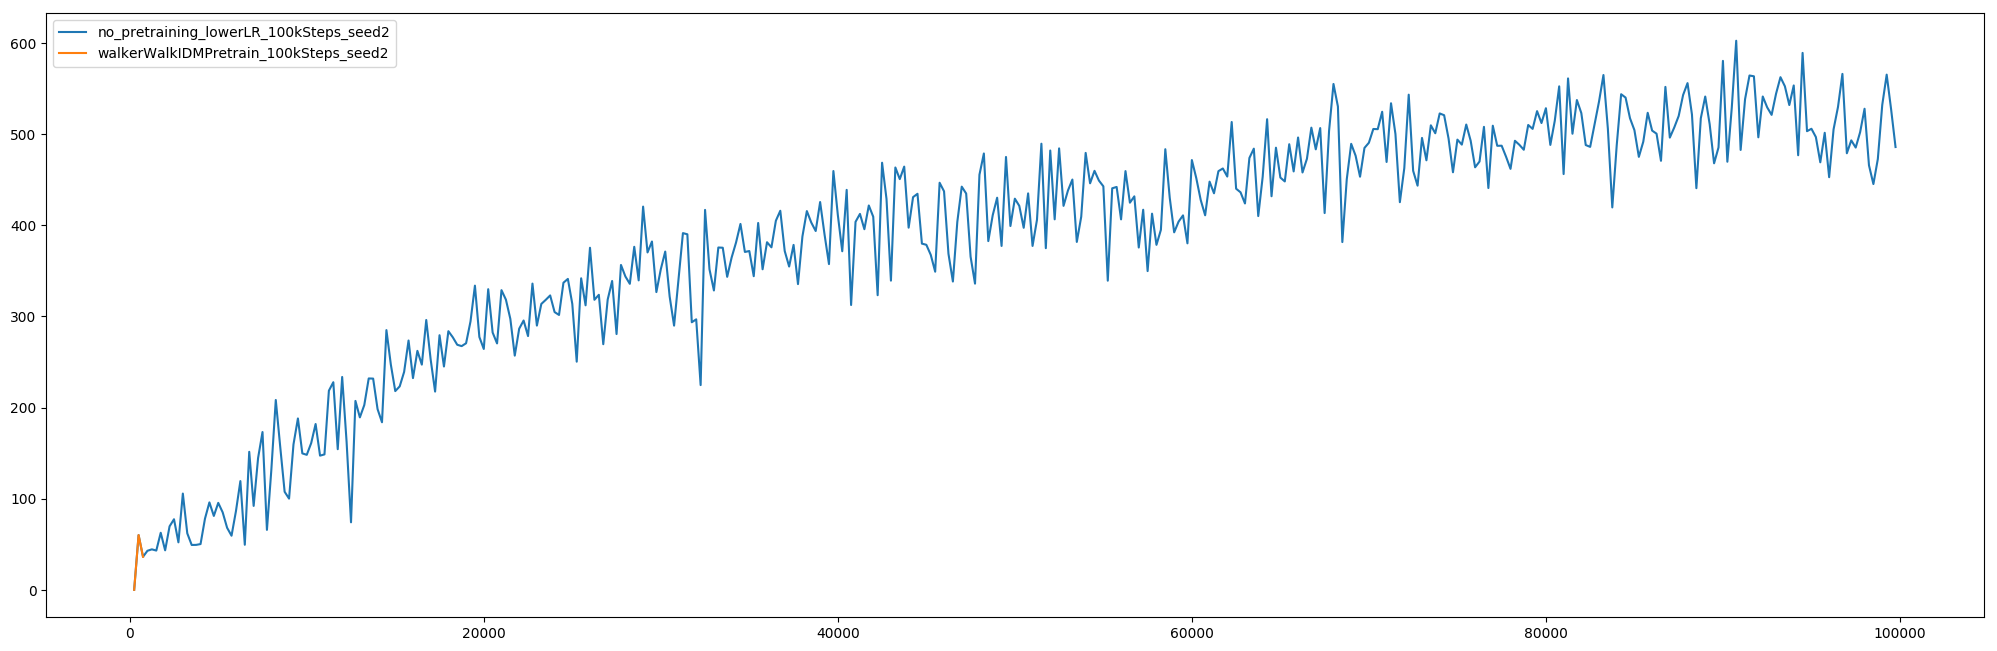

In [13]:
for fname in visualize_fnames:
    X, y, plot_name = show_log(fname)
    plt.plot(X, y, label=plot_name)
    # plt.vlines(X[-10], ymin=0, ymax=200, label=plot_name, color='B')

plt.rcParams['figure.figsize'] = [25, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.legend()
plt.show()